In [ ]:
    pip install symbulate

     |████████████████████████████████| 51kB 2.8MB/s 


In [ ]:
from symbulate import *
import matplotlib.pyplot as plt 
%matplotlib inline

### 1. Functions for our threshold finding strategy for both exp and uniform

In [ ]:
""" 
Determines the probability of picking the best prize from the set of doors and parameters
from the Exponential distribution

Parameters: 
num_of_doors (int): The number of doors the contestant can choose from
mean (int): mean of Exponential distribution
num_of_sim (int): number of sims to run
threshold_to_switch (int): The threshold to switch from the first door choice

Returns: 
prob_of_success (float): Probablity that the contestant chooses the best door choice
"""
def probability_of_picking_best_door_from_exp(num_of_doors, mean, num_of_sim, threshold_to_switch):

    exp_distribution_RV = RV(DiscreteUniform(1, num_of_doors) * (Exponential(1/mean)) ** num_of_doors)
    exp_outcomes = exp_distribution_RV.sim(num_of_sim)

    count_of_success = 0

    for index in range(num_of_sim):
        current_outcome = exp_outcomes.get(index)
        door_choice = exp_outcomes.get(index)[0]
        tuple_of_door_outcomes = exp_outcomes.get(index)[1]
        current_value = tuple_of_door_outcomes[door_choice - 1]
        max_value = max(tuple_of_door_outcomes)
        
        if (current_value < threshold_to_switch): # switch doors if original door choice < threshold
            outcome_list = list(tuple_of_door_outcomes) # Create list from door outcomes
            outcome_list.remove(current_value) # Remove the door contestant chose
            switch_doors = RV(BoxModel(outcome_list)).sim(1) # Pick one of the remaining doors
            switched_door_value = float(switch_doors.get(0)) # Get value of new door choice
            if switched_door_value == float(max_value): # Compare new door choice to best choice
                count_of_success += 1
        else: # Else, we stick with original door choice
            if float(current_value) == float(max_value): # Compare original door choice to best choice
                count_of_success += 1

    prob_of_success = count_of_success / num_of_sim
    print(f'Probability of success given threshold = {threshold_to_switch} from exp distribution: {prob_of_success}')
    return prob_of_success

In [ ]:
""" 
Determines the probability of picking the best prize from the set of doors and parameters
from the Uniform distribution

Parameters: 
num_of_doors (int): The number of doors the contestant can choose from
mean (int): mean of Normal distribution
num_of_sim (int): number of sims to run
threshold_to_switch (int): The threshold to switch from the first door choice

Returns: 
prob_of_success (int): Probablity that the contestant chooses the best door choice
"""
def probability_of_picking_best_door_from_uniform(num_of_doors, mean, num_of_sim, threshold_to_switch):

    uniform_distribution_RV = RV(DiscreteUniform(1, num_of_doors) * Uniform(0,mean*2) ** num_of_doors)
    uniform_outcomes = uniform_distribution_RV.sim(num_of_sim)

    count_of_success = 0

    for index in range(num_of_sim):
        current_outcome = uniform_outcomes.get(index)
        door_choice = uniform_outcomes.get(index)[0]
        tuple_of_door_outcomes = uniform_outcomes.get(index)[1]
        current_value = tuple_of_door_outcomes[door_choice - 1]
        max_value = max(tuple_of_door_outcomes)
        
        if (current_value < threshold_to_switch): # switch doors if original door choice < threshold
            outcome_list = list(tuple_of_door_outcomes) # Create list from door outcomes
            outcome_list.remove(current_value) # Remove the door contestant chose
            switch_doors = RV(BoxModel(outcome_list)).sim(1) # Pick one of the remaining doors
            switched_door_value = float(switch_doors.get(0)) # Get value of new door choice
            if switched_door_value == float(max_value): # Compare new door choice to best choice
                count_of_success += 1
        else: # Else, we stick with original door choice
            if float(current_value) == float(max_value): # Compare original door choice to best choice
                count_of_success += 1

    prob_of_success = count_of_success / num_of_sim
    print(f'Probability of success given threshold = {threshold_to_switch} from uniform distribution: {prob_of_success}')
    return prob_of_success

### 2. finding the optimal threshold
can change the number of doors parameter

In [ ]:
thresholds_to_switch = [0, 10, 20 , 30, 40, 50, 60, 70, 80, 90, 100]
uniform_probability_outcomes = []
num_of_doors = 5 # Change between 3, 5, and 10 to recreate all graphs from presentation

for threshold_value in thresholds_to_switch:
    success_percentage = probability_of_picking_best_door_from_uniform(num_of_doors, 50, 10000, threshold_value)
    uniform_probability_outcomes.append(success_percentage)

thresholds_to_switch = [0, 10, 20 , 30, 40, 50, 60, 70, 80, 90, 100]
exp_probability_outcomes = []

for threshold_value in thresholds_to_switch:
    success_percentage = probability_of_picking_best_door_from_exp(num_of_doors, 50, 10000, threshold_value)
    exp_probability_outcomes.append(success_percentage)

Probability of success given threshold = 0 from uniform distribution: 0.2004
Probability of success given threshold = 10 from uniform distribution: 0.2232
Probability of success given threshold = 20 from uniform distribution: 0.2527
Probability of success given threshold = 30 from uniform distribution: 0.2739
Probability of success given threshold = 40 from uniform distribution: 0.2902
Probability of success given threshold = 50 from uniform distribution: 0.3273
Probability of success given threshold = 60 from uniform distribution: 0.3366
Probability of success given threshold = 70 from uniform distribution: 0.3353
Probability of success given threshold = 80 from uniform distribution: 0.3118
Probability of success given threshold = 90 from uniform distribution: 0.2759
Probability of success given threshold = 100 from uniform distribution: 0.1972
Probability of success given threshold = 0 from exp distribution: 0.2009
Probability of success given threshold = 10 from exp distribution: 0.

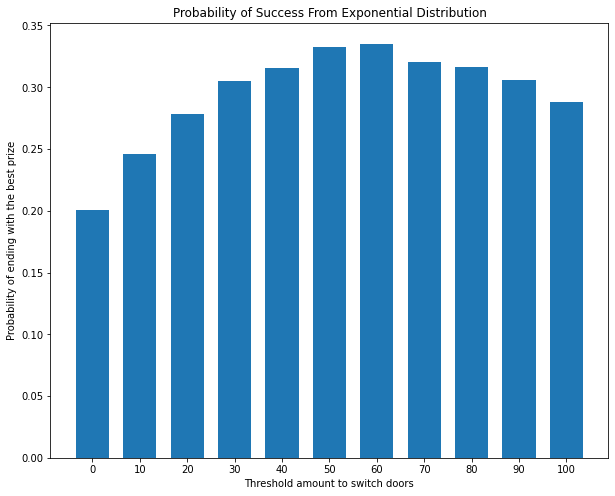

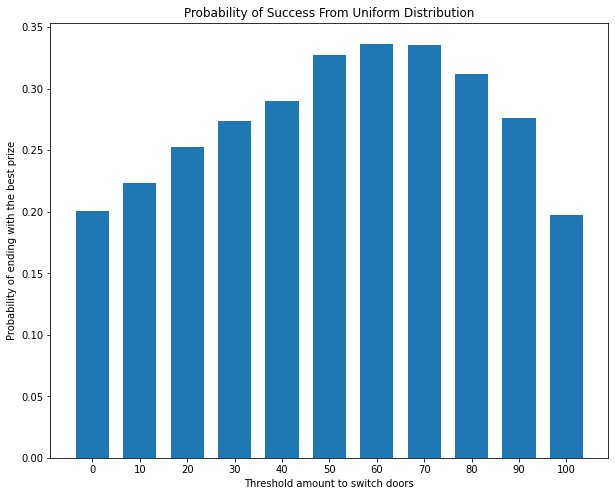

In [ ]:
# creating the bar plot 
plt.figure(figsize=(10, 8))
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.bar(thresholds_to_switch, exp_probability_outcomes, width=7) 
plt.xlabel("Threshold amount to switch doors") 
plt.ylabel("Probability of ending with the best prize") 
plt.title("Probability of Success From Exponential Distribution") 
plt.show() 

# creating the bar plot 
plt.figure(figsize=(10, 8))
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.bar(thresholds_to_switch, uniform_probability_outcomes, width=7) 
plt.xlabel("Threshold amount to switch doors") 
plt.ylabel("Probability of ending with the best prize") 
plt.title("Probability of Success From Uniform Distribution") 
plt.show()

### 3. probability of success given number of doors
can change threshold parameter

In [ ]:
door_numbers = [2,3,4,5,6,7,8,9,10]
exp_door_outcomes = []
threshold_value = 50 # Change between 50 and 75 to recreate graphs from presentation

for num_doors in door_numbers:
    success_percentage = probability_of_picking_best_door_from_exp(num_doors, 50, 10000, 50)
    exp_door_outcomes.append(success_percentage)

door_numbers = [2,3,4,5,6,7,8,9,10]
uniform_door_outcomes = []

for num_doors in door_numbers:
    success_percentage = probability_of_picking_best_door_from_uniform(num_doors, 50, 10000, 50)
    uniform_door_outcomes.append(success_percentage)

Probability of success given threshold = 50 from exp distribution: 0.7331
Probability of success given threshold = 50 from exp distribution: 0.528
Probability of success given threshold = 50 from exp distribution: 0.4156
Probability of success given threshold = 50 from exp distribution: 0.3382
Probability of success given threshold = 50 from exp distribution: 0.2784
Probability of success given threshold = 50 from exp distribution: 0.2392
Probability of success given threshold = 50 from exp distribution: 0.2049
Probability of success given threshold = 50 from exp distribution: 0.1874
Probability of success given threshold = 50 from exp distribution: 0.1684
Probability of success given threshold = 50 from uniform distribution: 0.7449
Probability of success given threshold = 50 from uniform distribution: 0.5249
Probability of success given threshold = 50 from uniform distribution: 0.3991
Probability of success given threshold = 50 from uniform distribution: 0.3146
Probability of success 

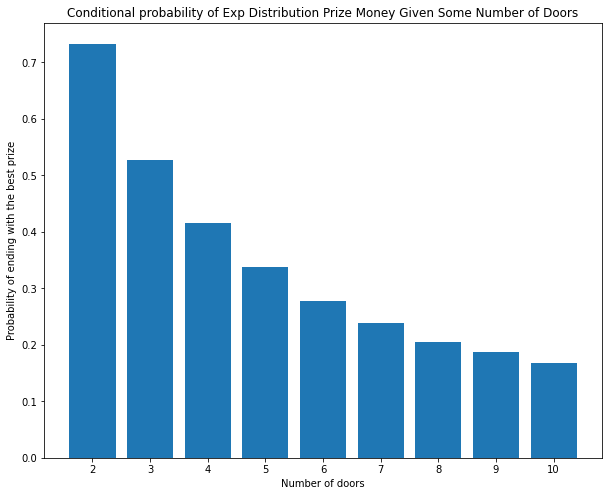

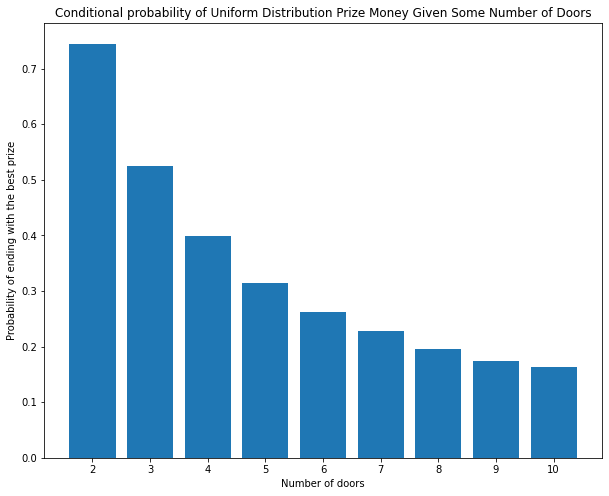

In [ ]:
# creating the bar plot 
plt.figure(figsize=(10, 8))
plt.bar(door_numbers, exp_door_outcomes) 
plt.xticks([2,3,4,5,6,7,8,9,10])
plt.xlabel("Number of doors") 
plt.ylabel("Probability of ending with the best prize") 
plt.title("Conditional probability of Exp Distribution Prize Money Given Some Number of Doors") 
plt.show()

# creating the bar plot 
plt.figure(figsize=(10, 8))
plt.bar(door_numbers, uniform_door_outcomes)
plt.xticks([2,3,4,5,6,7,8,9,10])
plt.xlabel("Number of doors") 
plt.ylabel("Probability of ending with the best prize") 
plt.title("Conditional probability of Uniform Distribution Prize Money Given Some Number of Doors") 
plt.show() 